In [1]:
# imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Analyzing the Impact of Demographic and Environmental Factors on Traffic Accidents in the U.S.

## Introduction
Traffic accidents are a major public safety issue in the United States, leading to significant economic costs, injuries, and fatalities. While environmental factors like weather are well-known contributors, the role of demographic and socioeconomic factors is less understood.

This project explores the relationship between traffic accidents and demographic characteristics across U.S. counties. By merging traffic accident data with U.S. Census demographic information, I aim to identify how factors such as income, population density, and employment influence accident rates and severity. This analysis seeks to uncover patterns that could inform more effective road safety policies and interventions.

## Research Questions:
1. How do demographic factors influence the frequency and severity of traffic accidents?
2. What is the impact of weather conditions on accident rates across different counties?
3. How does transportation mode (drive, carpool, transit, walk) correlate with accident rates in different counties?
4. How does population density affect the frequency and severity of traffic accidents?
5. Is there a correlation between unemployment or income levels and accident rates?
6. How do different times of day (civil twilight, sunrise/sunset) affect accident rates across various counties?
7. How do accident rates differ between urban and rural counties?
8. How does the presence of traffic control measures (e.g., traffic signals, roundabouts) vary across counties with different demographic profiles?
9. Does the presence of specific infrastructure (e.g., traffic signals, roundabouts) in counties reduce accident frequency?
10. How do different racial and ethnic groups correlate with traffic accident rates?
11. Do counties with higher percentages of residents working from home experience fewer traffic accidents?
12. Is there a link between the average commute time in a county and its accident rate?
13. Determine which demographic factors (e.g., income, population density, employment, race/ethnicity) and environmental factors (e.g., weather conditions, visibility, road conditions) are most strongly associated with the frequency and severity of traffic accidents.
14. Explore and visualize patterns in the data that reveal how different counties or regions may be more susceptible to traffic accidents due to their demographic makeup or environmental conditions.
15. Provide insights that could help policymakers, urban planners, and public safety officials design targeted interventions to reduce traffic accidents. For example, identifying high-risk areas or populations could lead to more effective road safety campaigns, infrastructure improvements, or traffic regulations.

To begin the project, I will start by exploring the U.S. Census demographic dataset to understand its structure and key variables, such as population, income, and employment across counties. This initial exploration will help me familiarize myself with the data and prepare for its integration with the traffic accident dataset in the next phase.

## Understanding the U.S. Census demographic Dataset

First of all, let's read the dataset.

In [2]:
census = pd.read_csv("acs2017_county_data.csv")  
# This dataset contains ACS data for each county in the US for 2017.

In [3]:
# I will display the first few rows to understand the structure
census.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


Now, I am going to take a detailed look at the dataset and its columns, gaining a solid understanding of the characteristics, distributions, and relationships of each column in the dataset. I will then be able to proceed with more in-depth analysis and visualizations based on these initial findings.

Let's see the names of the columns

In [4]:
census.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

To ensure high-quality analysis, it's essential to understand the meaning of every column in the dataset. Each column represents a specific aspect of the data, and without a clear understanding of what each one signifies, the analysis could lead to inaccurate conclusions. Let's make some groups.<br>
1. `CountyId`, `State`, `County` - unique identifiers and geographical information
2. `TotalPop`, `Men`, `Women` - population metrics
3. `Hispanic`, `White`, `Black`, `Native`, `Asian`, `Pacific` - ethnic demographics
4. `VotingAgeCitizen` - number of citizens eligible to vote
5. `Income`, `IncomeErr`, `IncomePerCap`, `IncomePerCapErr` - economic data
6. `Poverty`, `ChildPoverty` - poverty metrics
7. `Professional`, `Service`, `Office`, `Construction`, `Production` - employment sectors
8. `Drive`, `Carpool`, `Transit`, `Walk`, `OtherTransp`, `WorkAtHome` - transportation methods
9. `MeanCommute` - average commute time
10. `Employed`, `PrivateWork`, `PublicWork`, `SelfEmployed`, `FamilyWork`, `Unemployment` - employment metrics

I am not very impressed by the names! Why? Because in Python, it's common practice to use snake case (e.g., `county_id` instead of `CountyId`) for variable and column names. To maintain consistency and improve code readability, it's a good idea to rename the columns in our dataset to follow this convention.

In [5]:
def to_snake_case(column_name):
    return re.sub(r'(?<!^)(?=[A-Z])', '_', column_name).lower()

# Convert each word in the list to snake case
census.columns = [to_snake_case(column) for column in census.columns]

In [6]:
census.columns

Index(['county_id', 'state', 'county', 'total_pop', 'men', 'women', 'hispanic',
       'white', 'black', 'native', 'asian', 'pacific', 'voting_age_citizen',
       'income', 'income_err', 'income_per_cap', 'income_per_cap_err',
       'poverty', 'child_poverty', 'professional', 'service', 'office',
       'construction', 'production', 'drive', 'carpool', 'transit', 'walk',
       'other_transp', 'work_at_home', 'mean_commute', 'employed',
       'private_work', 'public_work', 'self_employed', 'family_work',
       'unemployment'],
      dtype='object')

Yeah, we're PYTHONS now and I can continue with the dataset review using the `info()` method! This method is useful for getting an overview of the dataset, identifying missing data, and understanding the structure of the DataFrame.

In [7]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   county_id           3220 non-null   int64  
 1   state               3220 non-null   object 
 2   county              3220 non-null   object 
 3   total_pop           3220 non-null   int64  
 4   men                 3220 non-null   int64  
 5   women               3220 non-null   int64  
 6   hispanic            3220 non-null   float64
 7   white               3220 non-null   float64
 8   black               3220 non-null   float64
 9   native              3220 non-null   float64
 10  asian               3220 non-null   float64
 11  pacific             3220 non-null   float64
 12  voting_age_citizen  3220 non-null   int64  
 13  income              3220 non-null   int64  
 14  income_err          3220 non-null   int64  
 15  income_per_cap      3220 non-null   int64  
 16  income

I obtained important information such as the number of records (rows), the number of columns, the column names, the data types, and the number of non-zero values in each column.

### Data Cleaning and Preparation

In [8]:
# Better checking for missing values
missing_values = census.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values in Columns:")
print(missing_values)

Missing Values in Columns:
child_poverty    1
dtype: int64


In [9]:
# Check the percentage of missing data in each column
missing_percentage = (missing_values / len(census)) * 100
print("Percentage of missing values:\n", missing_percentage)

Percentage of missing values:
 child_poverty    0.031056
dtype: float64


Only one missing value! `IMPUTATION`! To handle missing values in numerical columns, I can replace them with the column's mean, median, or mode.

In [10]:
# Mean imputation for 'child_poverty and  no more missing values'
census['child_poverty'].fillna(census['child_poverty'].mean(), inplace=True)

Nice, but seeing the data types I think I should do some changes. For example columns like `state` or `county` should be categorical.

In [11]:
census['state'] = census['state'].astype('category')
census['county'] = census['county'].astype('category')

It's easy to see that most of the columns in the dataset are numeric. To gain more detailed insights into these numeric columns, we can use the `describe()` method. This method provides summary statistics, such as the mean, median, standard deviation, and range, giving us a better understanding of the distribution and characteristics of the numeric data.

In [12]:
# Summary statistics for numerical columns
census.describe().T

,count,mean,std,min,25%,50%,75%,max
county_id,3220.0,31393.605280,16292.078954,1001.0,19032.500,30024.0,46105.500,72153.0
total_pop,3220.0,100768.127329,324499.589466,74.0,11213.500,25847.5,66608.250,10105722.0
men,3220.0,49587.810559,159321.182902,39.0,5645.500,12879.0,33017.250,4979641.0
women,3220.0,51180.316770,165216.389158,35.0,5553.500,12993.5,33593.750,5126081.0
hispanic,3220.0,11.296584,19.342522,0.0,2.100,4.1,10.000,100.0
white,3220.0,74.920186,23.056700,0.0,63.500,83.6,92.800,100.0
black,3220.0,8.681957,14.333571,0.0,0.600,2.0,9.500,86.9
native,3220.0,1.768416,7.422946,0.0,0.100,0.3,0.600,90.3
asian,3220.0,1.289379,2.716191,0.0,0.200,0.6,1.200,41.8
pacific,3220.0,0.083416,0.709277,0.0,0.000,0.0,0.100,33.7


### Exploratory Data Analysis (EDA)

#### Demographic Distribution
I will use this type of analysis to understand the distribution of different ethnic groups, income levels, and poverty levels across counties.

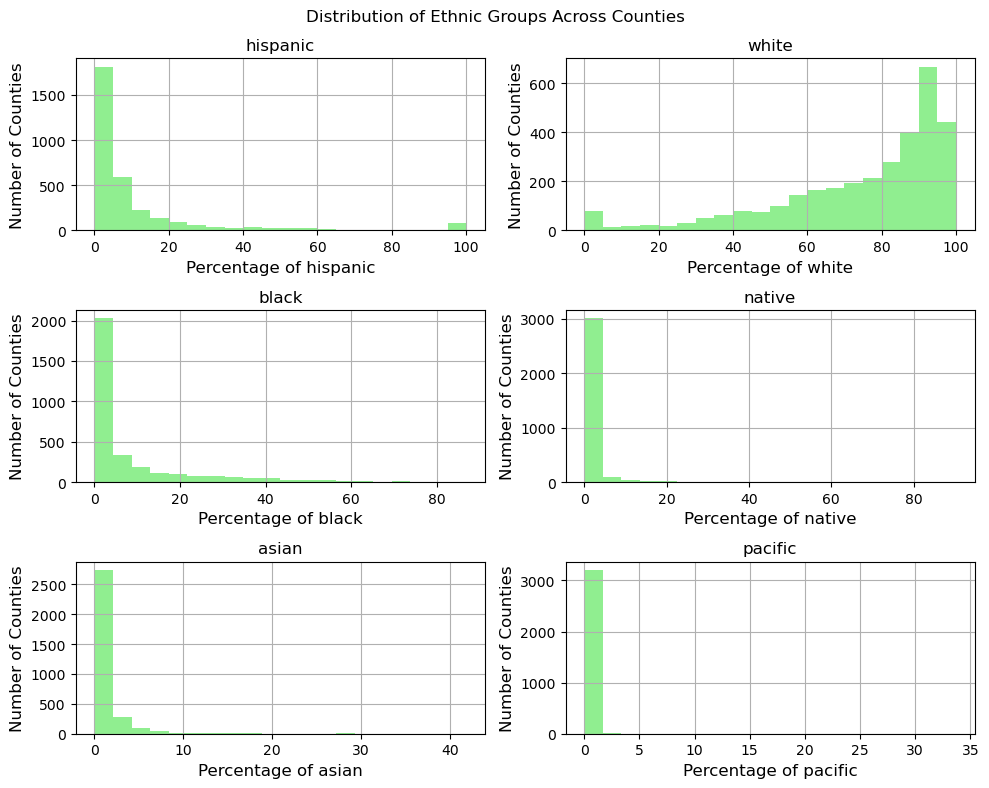

In [13]:
# Distribution of ethnic groups

ethnic_columns = ['hispanic', 'white', 'black', 'native', 'asian', 'pacific']

census[ethnic_columns].hist(bins=20, figsize=(10, 8), color='lightgreen')
plt.suptitle('Distribution of Ethnic Groups Across Counties')

for ax, col in zip(plt.gcf().get_axes(), ethnic_columns):
    ax.set_xlabel(f'Percentage of {col}', fontsize=12)
    ax.set_ylabel('Number of Counties', fontsize=12)
    
plt.tight_layout()
plt.show()

The histograms reveal significant ethnic diversity across U.S. counties. Most counties are predominantly white, with a large concentration showing 80-100% White populations. Hispanic and black populations are more dispersed, with most counties having less than 20% of these groups, though some counties exhibit very high concentrations. Native, Asian, and Pacific Islander populations are largely absent in many counties, with significant presence only in specific regions. This suggests a pattern of ethnic concentration in certain areas, while many counties remain ethnically homogeneous.

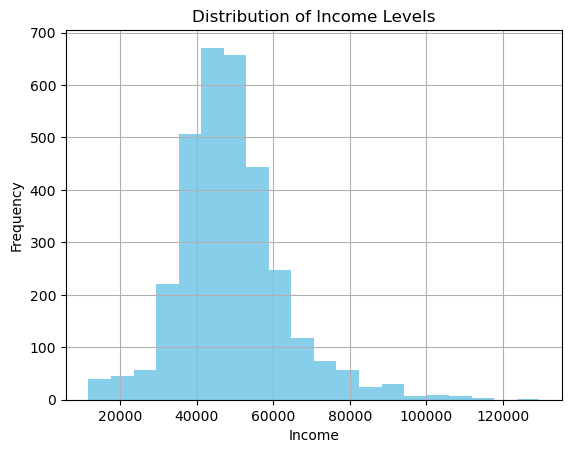

In [14]:
# Distribution of income levels

census['income'].hist(bins=20, color='skyblue')
plt.title('Distribution of Income Levels')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

The histogram reveals that the most common income range is between `$40,000` and `$60,000`, indicating that a large portion of the population falls within this bracket. The distribution is roughly bell-shaped, suggesting a normal distribution of income levels with symmetry around the central peak. There are fewer individuals with very high or very low incomes, as seen by the sharp decline in frequency on either side of the peak.

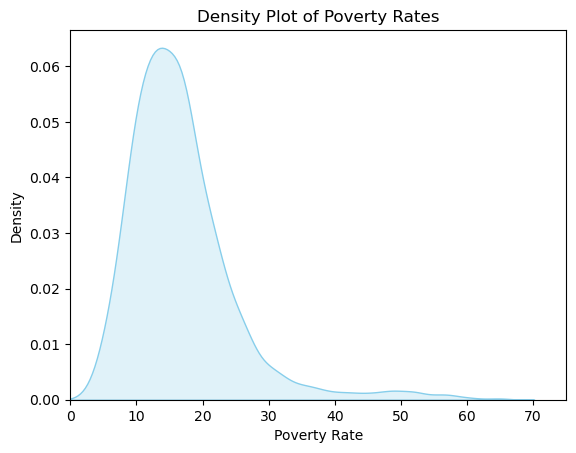

In [15]:
# Explore the distribution of poverty rates.

sns.kdeplot(census['poverty'], fill=True, color='skyblue')
plt.title('Density Plot of Poverty Rates')
plt.xlabel('Poverty Rate')
plt.xlim(0, 75)
plt.show()

The density plot shows that the most common poverty rate is around 10%, with a majority of regions falling within this range. However, the plot is right-skewed, indicating that while most areas have lower poverty rates, there are some with significantly higher rates, extending up to 70%. This visualization is important for understanding the distribution of poverty across regions and is valuable for economists, policymakers, and social scientists focused on poverty and income inequality.

#### Correlation Analysis

In [16]:
correlation_matrix = census[['income', 'poverty', 'professional', 'service', 'unemployment']].corr()
correlation_matrix

,income,poverty,professional,service,unemployment
income,1.000000,-0.764594,0.592376,-0.359235,-0.506737
poverty,-0.764594,1.000000,-0.348950,0.378409,0.730875
professional,0.592376,-0.348950,1.000000,-0.295039,-0.262633
service,-0.359235,0.378409,-0.295039,1.000000,0.344190
unemployment,-0.506737,0.730875,-0.262633,0.344190,1.000000


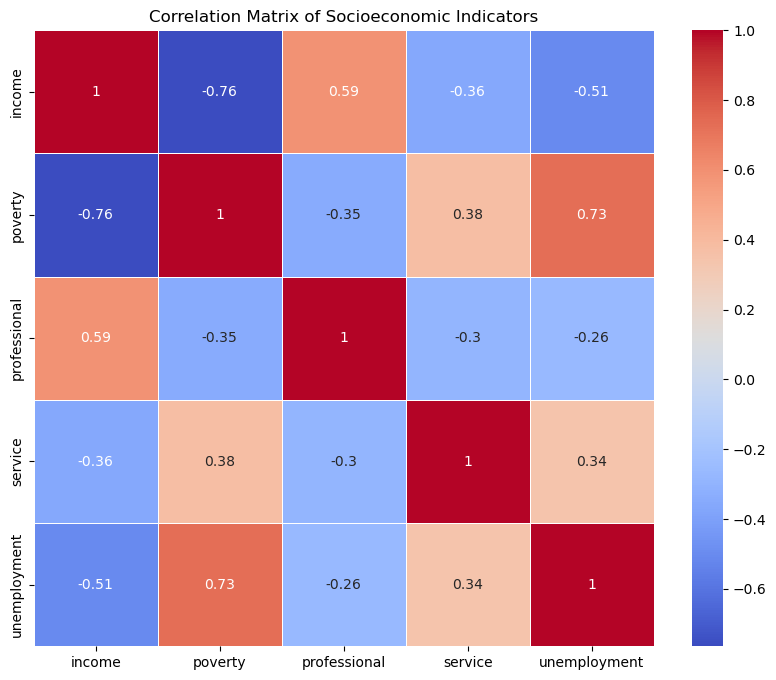

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Socioeconomic Indicators')
plt.show()

The heatmap reveals how interconnected these socioeconomic variables are. Key takeaways include:

Higher income tends to be associated with lower poverty and unemployment, and higher professional employment.
Poverty is closely linked with higher unemployment and more prevalent service occupations.
The presence of professional jobs is beneficial for reducing poverty and increasing income, while a reliance on service jobs may be linked with higher poverty and lower income.
These insights can be particularly useful for policymakers and researchers focusing on economic development, employment strategies, and poverty reduction.

### Comparative Studies

#### State vs. County Analysis

I will begin with the `state` column.
Using the `value_counts()` method is a good first step for understanding the distribution of counties across different states in our dataset.

In [18]:
# Unique states and their frequency
census['state'].value_counts()

state
Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Puerto Rico              78
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Florida                  67
Pennsylvania             67
Alabama                  67
South Dakota             66
Colorado                 64
Louisiana                64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico    

In [19]:
# Let's see the number of unique counties
print(f"Number of unique counties: {census['county'].nunique()}")

Number of unique counties: 1955


After this, I want to aggregate data at the state level to compare states on various metrics (e.g., average income, poverty rates).

In [20]:
state_aggregates = census.groupby('state').agg({
    'income': 'mean',
    'poverty': 'mean',
    'unemployment': 'mean'
}).reset_index()

C:\Users\Цецо\AppData\Local\Temp\ipykernel_10944\3592530104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_aggregates = census.groupby('state').agg({


In [21]:
state_aggregates.head(10)

,state,income,poverty,unemployment
0,Alabama,40271.402985,20.949254,9.023881
1,Alaska,66425.448276,13.555172,9.655172
2,Arizona,45816.666667,20.193333,9.766667
3,Arkansas,39025.080000,20.421333,7.292000
4,California,61046.758621,15.737931,8.265517
5,Colorado,54353.562500,13.234375,5.793750
6,Connecticut,74496.000000,9.200000,6.775000
7,Delaware,61294.666667,12.300000,6.433333
8,District of Columbia,77649.000000,17.400000,8.000000
9,Florida,47144.328358,17.150746,7.765672


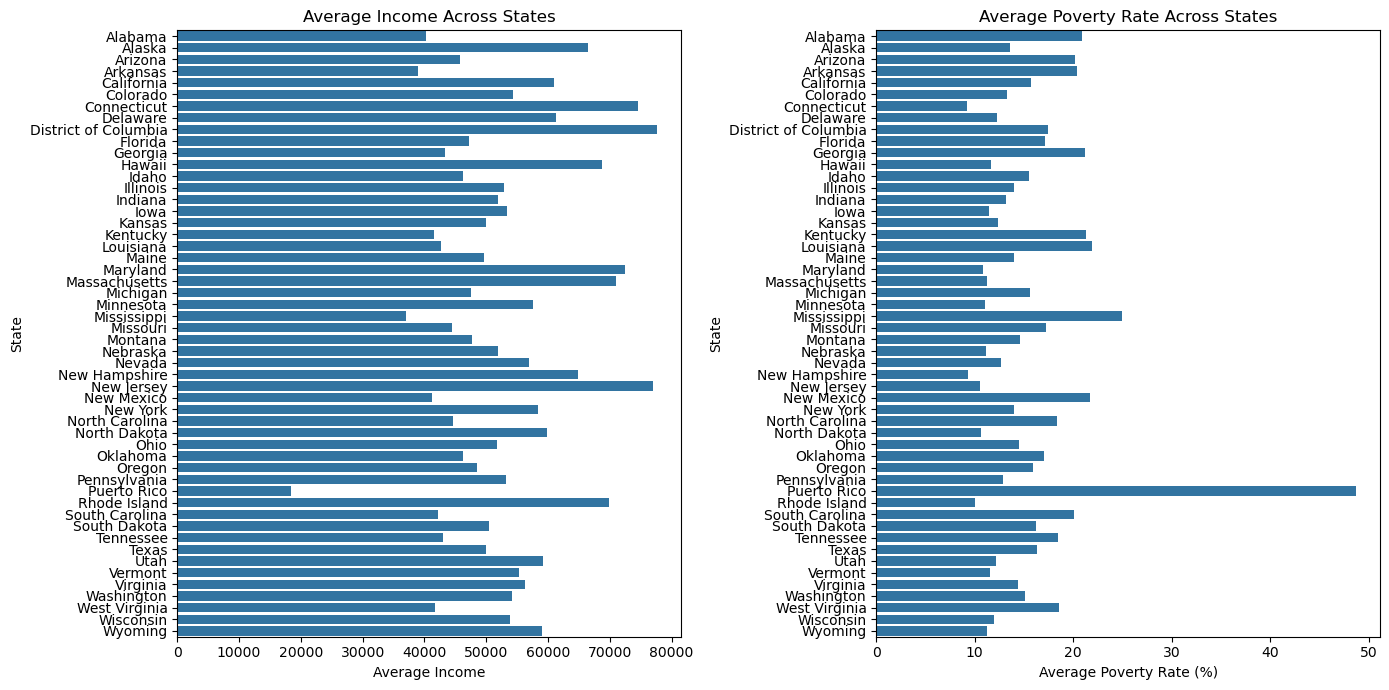

In [22]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x='income', y='state', data=state_aggregates.sort_values('income', ascending=False))
plt.title('Average Income Across States')
plt.xlabel('Average Income')
plt.ylabel('State')

plt.subplot(1, 2, 2)
sns.barplot(x='poverty', y='state', data=state_aggregates.sort_values('poverty', ascending=False))
plt.title('Average Poverty Rate Across States')
plt.xlabel('Average Poverty Rate (%)')
plt.ylabel('State')

plt.tight_layout()
plt.show()

#### Education Level vs. Income Analysis

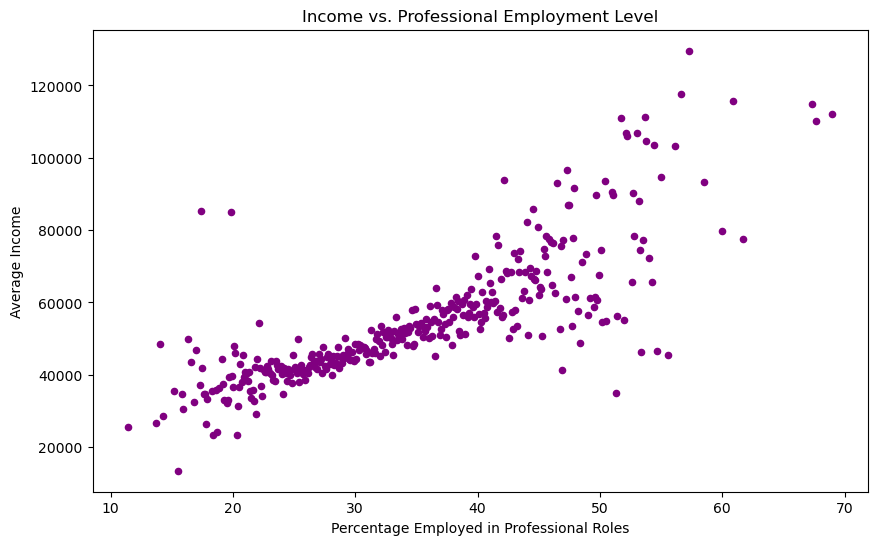

In [23]:
education_income_analysis = census.groupby('professional').agg({
    'income': 'mean',
    'poverty': 'mean'
}).reset_index()

# Plotting
education_income_analysis.plot(kind='scatter', x='professional', y='income', figsize=(10, 6), color='purple')
plt.title('Income vs. Professional Employment Level')
plt.xlabel('Percentage Employed in Professional Roles')
plt.ylabel('Average Income')
plt.show()

It's time to understand the second data source which is a countrywide car accident dataset that covers 49 states of the USA.
The US-Accidents dataset can be used for numerous applications, such as real-time car accident prediction, studying car accident hotspot locations, casualty analysis, extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence.

## Understanding the U.S. Accidents Dataset

In [24]:
accidents = pd.read_csv("US_Accidents_March23_sampled_500k.csv")

In [25]:
# Display the first few rows to understand the structure of the dataset
print("First 5 rows of the dataset:")
accidents.head()

First 5 rows of the dataset:


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [26]:
# The columns
accidents.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [27]:
# to snake case
def to_snake_case(column_name):
    return column_name.lower()

accidents.columns = [to_snake_case(column) for column in accidents.columns]

In [28]:
accidents.columns

Index(['id', 'source', 'severity', 'start_time', 'end_time', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'distance(mi)', 'description',
       'street', 'city', 'county', 'state', 'zipcode', 'country', 'timezone',
       'airport_code', 'weather_timestamp', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_direction',
       'wind_speed(mph)', 'precipitation(in)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'turning_loop', 'sunrise_sunset', 'civil_twilight', 'nautical_twilight',
       'astronomical_twilight'],
      dtype='object')

In [29]:
# Check the data types of each column
print("Data types of each column:")
accidents.dtypes

Data types of each column:


id                        object
source                    object
severity                   int64
start_time                object
end_time                  object
start_lat                float64
start_lng                float64
end_lat                  float64
end_lng                  float64
distance(mi)             float64
description               object
street                    object
city                      object
county                    object
state                     object
zipcode                   object
country                   object
timezone                  object
airport_code              object
weather_timestamp         object
temperature(f)           float64
wind_chill(f)            float64
humidity(%)              float64
pressure(in)             float64
visibility(mi)           float64
wind_direction            object
wind_speed(mph)          float64
precipitation(in)        float64
weather_condition         object
amenity                     bool
bump      

I don't like that time-related columns are in object format. I need to convert them to datetime.

In [30]:
accidents["start_time"] = pd.to_datetime(accidents["start_time"], format='mixed')
accidents["end_time"] = pd.to_datetime(accidents["end_time"], format='mixed')

In [31]:
# Verifying the changes
print("Data types after converting time-related columns:")
accidents[['start_time', 'end_time']].dtypes

Data types after converting time-related columns:


start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

In [32]:
# Check for missing values in the dataset
print("Missing values in each column:")
accidents.isnull().sum()

Missing values in each column:


id                            0
source                        0
severity                      0
start_time                    0
end_time                      0
start_lat                     0
start_lng                     0
end_lat                  220377
end_lng                  220377
distance(mi)                  0
description                   1
street                      691
city                         19
county                        0
state                         0
zipcode                     116
country                       0
timezone                    507
airport_code               1446
weather_timestamp          7674
temperature(f)            10466
wind_chill(f)            129017
humidity(%)               11130
pressure(in)               8928
visibility(mi)            11291
wind_direction            11197
wind_speed(mph)           36987
precipitation(in)        142616
weather_condition         11101
amenity                       0
bump                          0
crossing

In [33]:
# Get summary statistics for numerical columns
print("Summary statistics for numerical columns:")
accidents.describe().T

Summary statistics for numerical columns:


,count,mean,min,25%,50%,75%,max,std
severity,500000.0,2.212748,1.0,2.0,2.0,2.0,4.0,0.486661
start_time,500000,2020-06-03 12:09:29.692724480,2016-01-14 20:18:33,2018-11-23 06:47:16.249999872,2020-11-11 17:30:39,2022-01-18 16:04:00,2023-03-31 22:46:13,NaN
end_time,500000,2020-06-03 19:11:26.484368384,2016-02-08 06:37:08,2018-11-23 07:50:31.750000128,2020-11-11 22:44:21.500000,2022-01-19 08:01:51.750000128,2023-03-31 23:58:00,NaN
start_lat,500000.0,36.206421,24.562117,33.416823,35.832147,40.082443,48.999569,5.071411
start_lng,500000.0,-94.736583,-124.49742,-117.233047,-87.794365,-80.359601,-67.48413,17.405761
end_lat,279623.0,36.273192,24.57011,33.474773,36.192669,40.181341,48.998901,5.265333
end_lng,279623.0,-95.776553,-124.497419,-117.778324,-88.039013,-80.252449,-67.48413,18.120211
distance(mi),500000.0,0.564317,0.0,0.0,0.029,0.465,193.479996,1.774872
temperature(f),489534.0,61.646254,-77.8,49.0,64.0,76.0,207.0,19.000133
wind_chill(f),370983.0,58.229028,-53.2,43.0,62.0,75.0,207.0,22.352246


#### Exploratory Data Analysis (EDA)

I'll use a bar plot to visualize the distribution of accident severity levels

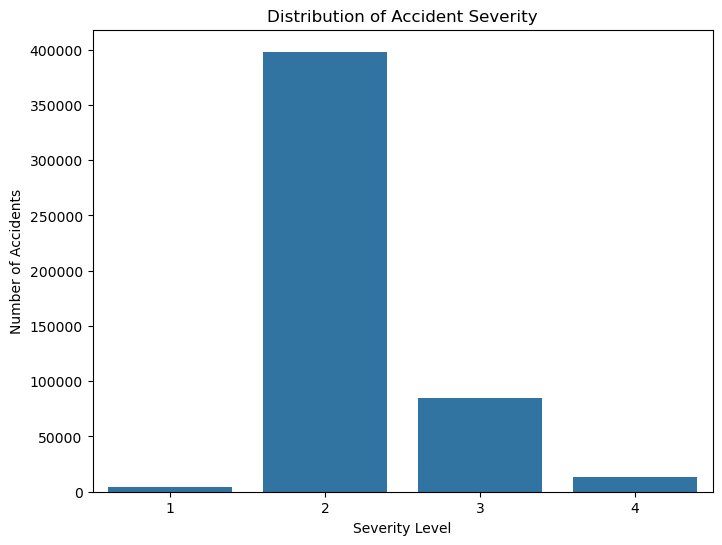

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='severity', data=accidents)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.show()

I'll create time series plots to visualize the number of accidents over different time intervals.

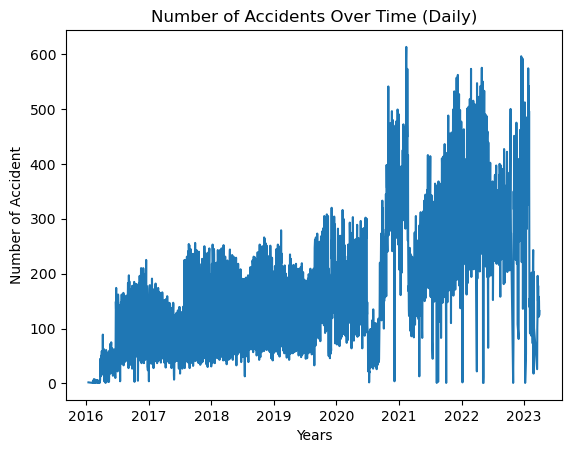

In [35]:
plt.plot(accidents['start_time'].dt.date.value_counts().sort_index())
plt.title("Number of Accidents Over Time (Daily)")
plt.xlabel("Years")
plt.ylabel("Number of Accident")
plt.show()

I'll plot the number of accidents by hour of the day.

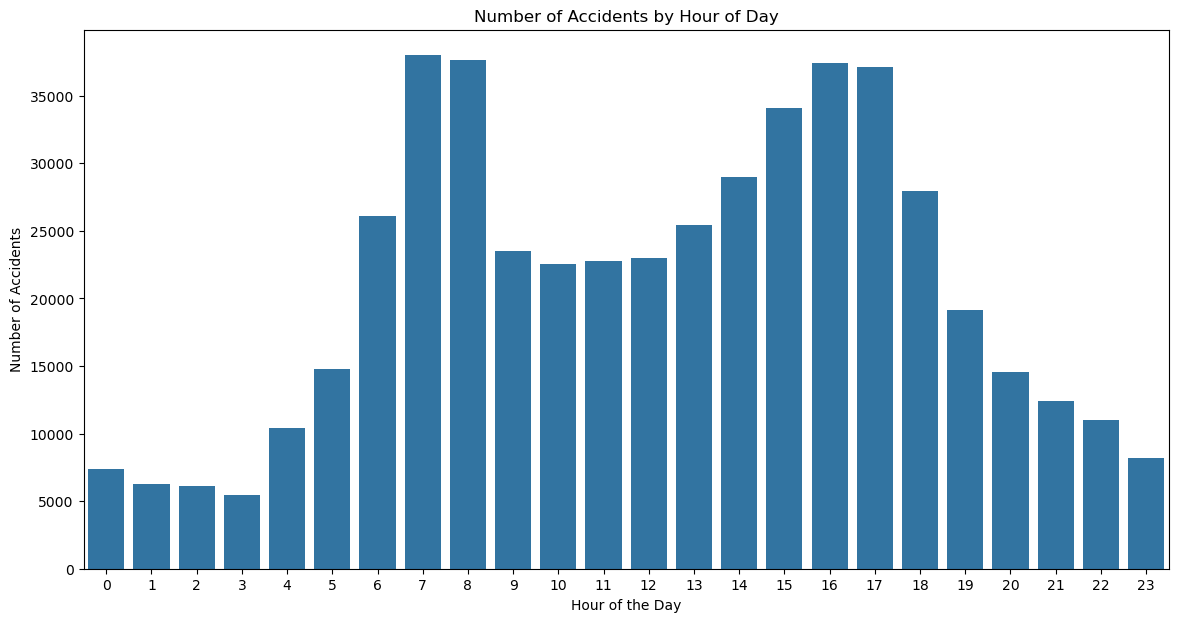

In [36]:
plt.figure(figsize=(14, 7))
accidents['hour'] = accidents['start_time'].dt.hour
sns.countplot(x='hour', data=accidents)
plt.title('Number of Accidents by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

### Correlation Analysis

I'll calculate and visualize the correlations between numerical columns, particularly focusing on weather conditions and severity.

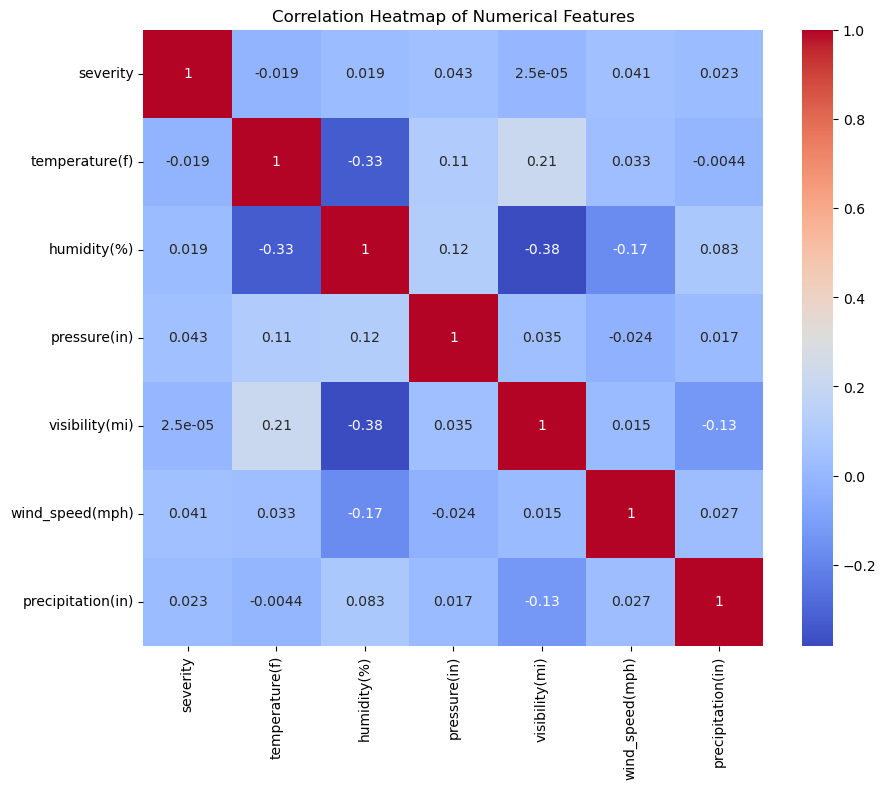

In [37]:
numerical_cols = ['severity', 'temperature(f)', 'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)']

correlation_matrix = accidents[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Merging the datasets

After I have carefully reviewed both data sources and gained a comprehensive understanding of the information they contain, I will be in a strong position to begin addressing any questions that arise. This deeper familiarity with the data will enable me to engage more effectively with the project, allowing me to explore the critical aspects in greater detail. At that point, I will be fully prepared to dive into the substantive work, analyze the key elements, and contribute meaningful insights to drive the project forward.

As understood from the beginning, the main goal of this project is to analyze and understand the impact of demographic and environmental factors on traffic accidents in the United States. The first important question, I asked myself <b>`How do demographic factors influence the frequency and severity of traffic accidents?`<b>

First of all i have to merge the two datasets. The two columns I will use for this are `'county'` and `'state'`

In [38]:
census.county

0            Autauga County
1            Baldwin County
2            Barbour County
3               Bibb County
4             Blount County
               ...         
3215    Vega Baja Municipio
3216      Vieques Municipio
3217     Villalba Municipio
3218      Yabucoa Municipio
3219        Yauco Municipio
Name: county, Length: 3220, dtype: category
Categories (1955, object): ['Abbeville County', 'Acadia Parish', 'Accomack County', 'Ada County', ..., 'Yuma County', 'Zapata County', 'Zavala County', 'Ziebach County']

In [39]:
accidents.county

0         East Baton Rouge
1                  Loudoun
2            Santa Barbara
3                    Mower
4                     Kern
                ...       
499995          Washington
499996          Palm Beach
499997             Yavapai
499998          Rockingham
499999            Hamilton
Name: county, Length: 500000, dtype: object

In [40]:
census.state

0           Alabama
1           Alabama
2           Alabama
3           Alabama
4           Alabama
           ...     
3215    Puerto Rico
3216    Puerto Rico
3217    Puerto Rico
3218    Puerto Rico
3219    Puerto Rico
Name: state, Length: 3220, dtype: category
Categories (52, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [41]:
accidents.state

0         LA
1         VA
2         CA
3         MN
4         CA
          ..
499995    OR
499996    FL
499997    AZ
499998    VA
499999    TN
Name: state, Length: 500000, dtype: object

As you can see `county` names and `state` abbreviations differ in format between the two datasets, I'll need to clean and standardize these fields before merging. Specifically, I'll want to:

1. Standardize the `county` names: Remove any additional text like "County" from the county column in the census.
2. Convert `state` names to abbreviations: Convert the full state names in the `census` to state abbreviations so they match the format in the `accidents` dataset.

In [47]:
# Clean the county names in the census dataset
census['county'] = census['county'].str.replace(' County', '')

In [48]:
# Convert full state names to state abbreviations
state_to_abbreviation = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia': 'DC',
    'Puerto Rico': 'PR'
}

In [49]:
census['state'] = census['state'].map(state_to_abbreviation)

In [50]:
census['state']

0       AL
1       AL
2       AL
3       AL
4       AL
        ..
3215    PR
3216    PR
3217    PR
3218    PR
3219    PR
Name: state, Length: 3220, dtype: category
Categories (52, object): ['AL', 'AK', 'AZ', 'AR', ..., 'WA', 'WV', 'WI', 'WY']

In [51]:
merged_df = pd.merge(accidents, census, on=['county', 'state'], how='inner')

In [52]:
merged_df.head()

,id,source,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),...,walk,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment
0,A-4694324,Source1,2,2022-12-03 23:37:14,2022-12-04 01:56:53,38.990562,-77.399070,38.990037,-77.398282,0.056,...,1.7,1.1,7.0,33.7,201528,78.7,16.8,4.4,0.1,3.8
1,A-4462395,Source1,2,2022-11-15 16:39:57,2022-11-15 19:36:12,38.988371,-77.431276,38.976051,-77.429294,0.858,...,1.7,1.1,7.0,33.7,201528,78.7,16.8,4.4,0.1,3.8
2,A-384137,Source2,2,2017-03-30 11:05:19,2017-03-30 11:35:07,39.080189,-77.499268,NaN,NaN,0.010,...,1.7,1.1,7.0,33.7,201528,78.7,16.8,4.4,0.1,3.8
3,A-507407,Source2,2,2017-07-26 10:46:44,2017-07-26 11:16:17,39.009724,-77.417320,NaN,NaN,0.000,...,1.7,1.1,7.0,33.7,201528,78.7,16.8,4.4,0.1,3.8
4,A-5257202,Source1,2,2022-09-03 19:22:41,2022-09-03 21:01:42,39.054795,-77.617893,39.051086,-77.618891,0.262,...,1.7,1.1,7.0,33.7,201528,78.7,16.8,4.4,0.1,3.8


In [12]:
# Summary statistics for population columns
population_columns = ['total_pop', 'men', 'women']
US_census_demographic_data[population_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
total_pop,3220.0,100768.127329,324499.589466,74.0,11213.5,25847.5,66608.25,10105722.0
men,3220.0,49587.810559,159321.182902,39.0,5645.5,12879.0,33017.25,4979641.0
women,3220.0,51180.316770,165216.389158,35.0,5553.5,12993.5,33593.75,5126081.0


In [32]:
total_population = US_census_demographic_data['total_pop'].sum()
print(f"The total population in USA is: {total_population}")

The total population in USA is: 324473370


In [33]:
total_women_population = US_census_demographic_data['women'].sum()
print(f"The total women population in USA is: {total_women_population}")

The total women population in USA is: 164800620


In [34]:
total_mens_population = US_census_demographic_data['men'].sum()
print(f"The total mens population in USA is: {total_mens_population}")

The total mens population in USA is: 159672750


Let's plot.

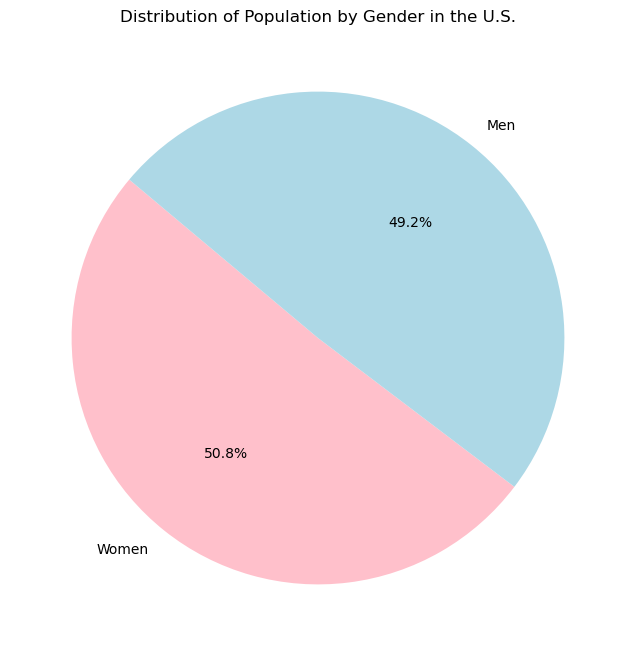

In [66]:
populations = [total_women_population, total_mens_population]
labels = ['Women', 'Men']
plt.figure(figsize=(8, 8))
plt.pie(populations, labels=labels, autopct='%1.1f%%', colors=['pink', 'lightblue'], startangle=140)

# Adding title
plt.title('Distribution of Population by Gender in the U.S.')

# Display the plot
plt.show()

We can clearly see that women are more.

In [58]:
# The row that contains minimum top population
US_census_demographic_data[US_census_demographic_data.total_pop == US_census_demographic_data.total_pop.min()]

,county_id,state,county,total_pop,men,women,hispanic,white,black,native,...,walk,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment
2673,48301,Texas,Loving County,74,39,35,16.2,74.3,0.0,5.4,...,7.7,0.0,7.7,22.4,39,53.8,28.2,17.9,0.0,0.0


In [70]:
# The row that contains max top population
US_census_demographic_data[US_census_demographic_data.total_pop == US_census_demographic_data.total_pop.max()]

,county_id,state,county,total_pop,men,women,hispanic,white,black,native,...,walk,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment
204,6037,California,Los Angeles County,10105722,4979641,5126081,48.4,26.5,7.9,0.2,...,2.7,2.3,5.3,30.9,4805817,79.3,11.2,9.3,0.2,7.8


In [71]:
racial_columns = ['hispanic', 'white', 'black', 'native', 'asian', 'pacific']
US_census_demographic_data[racial_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
hispanic,3220.0,11.296584,19.342522,0.0,2.1,4.1,10.0,100.0
white,3220.0,74.920186,23.056700,0.0,63.5,83.6,92.8,100.0
black,3220.0,8.681957,14.333571,0.0,0.6,2.0,9.5,86.9
native,3220.0,1.768416,7.422946,0.0,0.1,0.3,0.6,90.3
asian,3220.0,1.289379,2.716191,0.0,0.2,0.6,1.2,41.8
pacific,3220.0,0.083416,0.709277,0.0,0.0,0.0,0.1,33.7


In [85]:
# Summary descriptive statistics for economic columns
economic_columns = ['income', 'income_err', 'income_per_cap', 'income_per_cap_err', 'poverty', 'child_poverty']
US_census_demographic_data[economic_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
income,3220.0,48994.966770,13877.178398,11680.0,40622.000,47636.5,55476.0,129588.0
income_err,3220.0,3138.616770,2405.786950,262.0,1729.750,2587.0,3802.0,41001.0
income_per_cap,3220.0,25657.033230,6667.520452,5943.0,21568.000,25139.0,28997.0,69529.0
income_per_cap_err,3220.0,1514.442547,1156.708587,129.0,832.000,1225.0,1802.5,16145.0
poverty,3220.0,16.780776,8.309360,2.4,11.475,15.4,19.8,65.2
child_poverty,3219.0,23.040634,11.891934,0.0,14.900,21.5,28.6,83.6


In [79]:
employment_columns = ['professional', 'service', 'office', 'construction', 'production']
US_census_demographic_data[employment_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
professional,3220.0,31.479814,6.523912,11.4,27.2,30.5,34.9,69.0
service,3220.0,18.214286,3.742308,0.0,15.8,17.8,20.2,46.4
office,3220.0,21.878944,3.167228,4.8,19.9,22.1,23.9,37.2
construction,3220.0,12.592360,4.143504,0.0,9.8,12.1,14.8,36.4
production,3220.0,15.835745,5.808383,0.0,11.5,15.4,19.5,48.7


In [82]:
transportation_columns = ['drive', 'carpool', 'transit', 'walk', 'other_transp', 'work_at_home', 'mean_commute']
US_census_demographic_data[transportation_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
drive,3220.0,79.630963,7.663900,4.6,77.3,81.0,84.100,97.2
carpool,3220.0,9.851646,2.963054,0.0,8.0,9.5,11.300,29.3
transit,3220.0,0.938975,3.072571,0.0,0.1,0.3,0.800,61.8
walk,3220.0,3.244472,3.891510,0.0,1.4,2.3,3.825,59.2
other_transp,3220.0,1.598696,1.678232,0.0,0.8,1.3,1.900,43.2
work_at_home,3220.0,4.736894,3.073484,0.0,2.9,4.1,5.800,33.0
mean_commute,3220.0,23.474534,5.687241,5.1,19.6,23.2,27.000,45.1


In [83]:
employment_type_columns = ['employed', 'private_work', 'public_work', 'self_employed', 'family_work', 'unemployment']
US_census_demographic_data[employment_type_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
employed,3220.0,47092.950621,155815.934036,39.0,4573.000,10611.5,28747.25,4805817.0
private_work,3220.0,74.863323,7.647916,31.1,71.200,76.1,80.20,88.8
public_work,3220.0,17.086118,6.390868,4.4,12.700,15.9,19.90,64.8
self_employed,3220.0,7.772733,3.855454,0.0,5.200,6.8,9.20,38.0
family_work,3220.0,0.278820,0.448073,0.0,0.100,0.2,0.30,8.0
unemployment,3220.0,6.665590,3.772612,0.0,4.475,6.1,8.00,40.9


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


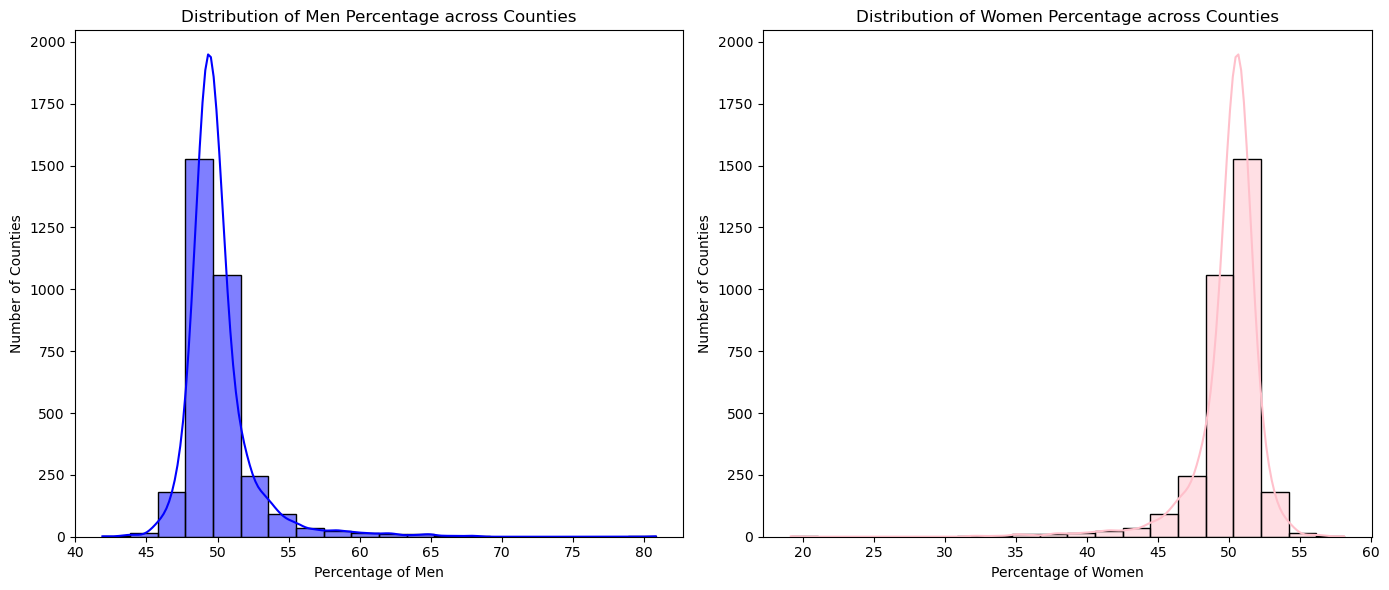

In [87]:
# Calculate the percentage of men and women
US_census_demographic_data['men_percentage'] = (US_census_demographic_data['men'] / US_census_demographic_data['total_pop']) * 100
US_census_demographic_data['women_percentage'] = (US_census_demographic_data['women'] / US_census_demographic_data['total_pop']) * 100

# Plot the distribution of Men and Women percentages
plt.figure(figsize=(14, 6))

# Men Percentage Distribution
plt.subplot(1, 2, 1)
sns.histplot(US_census_demographic_data['men_percentage'], bins=20, kde=True, color='blue')
plt.title('Distribution of Men Percentage across Counties')
plt.xlabel('Percentage of Men')
plt.ylabel('Number of Counties')

# Women Percentage Distribution
plt.subplot(1, 2, 2)
sns.histplot(US_census_demographic_data['women_percentage'], bins=20, kde=True, color='pink')
plt.title('Distribution of Women Percentage across Counties')
plt.xlabel('Percentage of Women')
plt.ylabel('Number of Counties')

plt.tight_layout()
plt.show()